In [297]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import json

# Json Parsing

In [298]:
newdata2 = """ {
        "prediction_type": "Regression",
        "target": "petal_width",
        "type":"regression",
        "partitioning": true}
       """

target = json.loads(newdata2)
type(target)

dict

In [31]:
target

NameError: name 'target' is not defined

# Load Data

In [32]:
import pandas as pd
dataset = pd.read_csv("iris.csv")
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [35]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
 dataset['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [37]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Feature Engineering

In [41]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
dataset['species']= label_encoder.fit_transform(dataset['species'])




In [42]:
# Store features matrix in X
X=dataset[['sepal_length', 'sepal_width', 'petal_length','species']]
#Store target vector in 
Y=dataset[['petal_width']]


In [45]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((105, 4), (45, 4))

In [ ]:
newdata3 = """ 
  {
    "feature_name": "sepal_length",
    "is_selected": true,
    "feature_variable_type": "numerical",
    "feature_details": {
      "numerical_handling": "Keep as regular numerical feature",
      "rescaling": "No rescaling",
      "make_derived_feats": false,
      "missing_values": "Impute",
      "impute_with": "Average of values",
      "impute_value": 0
    }
  }
       """

sepal_length = json.loads(newdata3)
type(sepal_length)

In [ ]:
sepal_length

In [ ]:
newdata4= """
 {"feature_name": "sepal_width",
          "is_selected": true,
          "feature_variable_type": "numerical",
          "feature_details": {
            "numerical_handling": "Keep as regular numerical feature",
            "rescaling": "No rescaling",
            "make_derived_feats": false,
            "missing_values": "Impute",
            "impute_with": "custom",
            "impute_value": -1
          }
        } """

sepal_width = json.loads(newdata4)
type(sepal_width)

In [ ]:
sepal_width

In [ ]:
newdata5= """
{
          "feature_name": "petal_length",
          "is_selected": true,
          "feature_variable_type": "numerical",
          "feature_details": {
            "numerical_handling": "Keep as regular numerical feature",
            "rescaling": "No rescaling",
            "make_derived_feats": false,
            "missing_values": "Impute",
            "impute_with": "Average of values",
            "impute_value": 0
          }
        } """

petal_length = json.loads(newdata5)
type(petal_length)

In [ ]:
petal_length

In [ ]:
newdata6= """
{
          "feature_name": "petal_width",
          "is_selected": true,
          "feature_variable_type": "numerical",
          "feature_details": {
            "numerical_handling": "Keep as regular numerical feature",
            "rescaling": "No rescaling",
            "make_derived_feats": false,
            "missing_values": "Impute",
            "impute_with": "custom",
            "impute_value": -2
          }
        }"""

petal_width = json.loads(newdata6)
type(petal_width)

In [ ]:
petal_width

In [ ]:
dataset

# Feature Extraction

## Correlation

<AxesSubplot:>

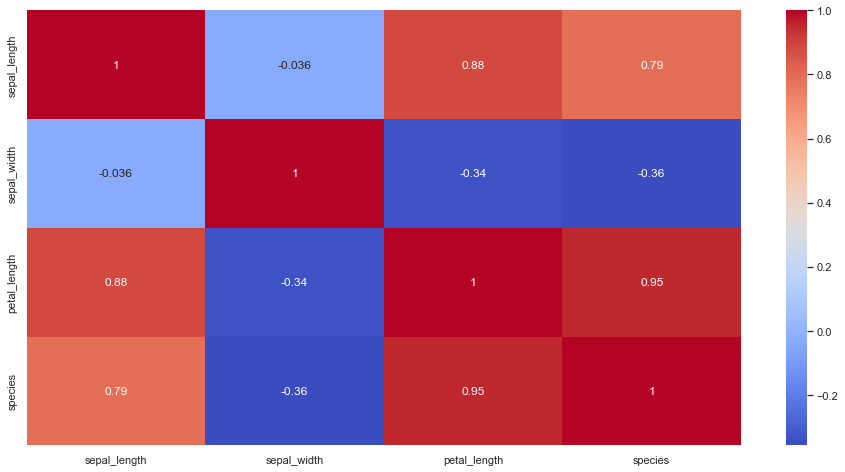

In [46]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(X_train.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

Here, we can see that petal_length is highly correlated with species(0.95), with sepal_length(0.88), with sepal_length(0.82) and negatively correlated with sepal_width(-0.34).

In [47]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [48]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))


1

In [49]:
corr_features

{'species'}

In [50]:
X_train_corr= X_train.drop(corr_features,axis=1)
X_test_corr= X_test.drop(corr_features,axis=1)

In [51]:
X_train_corr, X_test_corr

(     sepal_length  sepal_width  petal_length
 60            5.0          2.0           3.5
 116           6.5          3.0           5.5
 144           6.7          3.3           5.7
 119           6.0          2.2           5.0
 108           6.7          2.5           5.8
 ..            ...          ...           ...
 9             4.9          3.1           1.5
 103           6.3          2.9           5.6
 67            5.8          2.7           4.1
 117           7.7          3.8           6.7
 47            4.6          3.2           1.4
 
 [105 rows x 3 columns],
      sepal_length  sepal_width  petal_length
 114           5.8          2.8           5.1
 62            6.0          2.2           4.0
 33            5.5          4.2           1.4
 107           7.3          2.9           6.3
 7             5.0          3.4           1.5
 100           6.3          3.3           6.0
 40            5.0          3.5           1.3
 86            6.7          3.1           4.7
 76    

## PCA

In [52]:
from sklearn.decomposition import PCA

pca_5=PCA(n_components=5, random_state=2020)
pca_5.fit(dataset)
dataset_pca_5=pca_5.transform(dataset)

In [53]:
print("Variance explained by all 5 principal components =", sum(pca_5.explained_variance_ratio_*100))

Variance explained by all 5 principal components = 100.0


In [54]:
pca_5.explained_variance_ratio_*100

array([92.26404499,  4.8104112 ,  1.82996246,  0.70008617,  0.39549518])

The first component alone captures about 92.26% of the variability in the dataset and the second component alone captures about 4.81% of the variability in the dataset and so on.

If we get the cumulative sum of the above array, we can see the following array.

In [55]:
np.cumsum(pca_5.explained_variance_ratio_)

array([0.92264045, 0.97074456, 0.98904419, 0.99604505, 1.        ])

Then we can create the following plot.

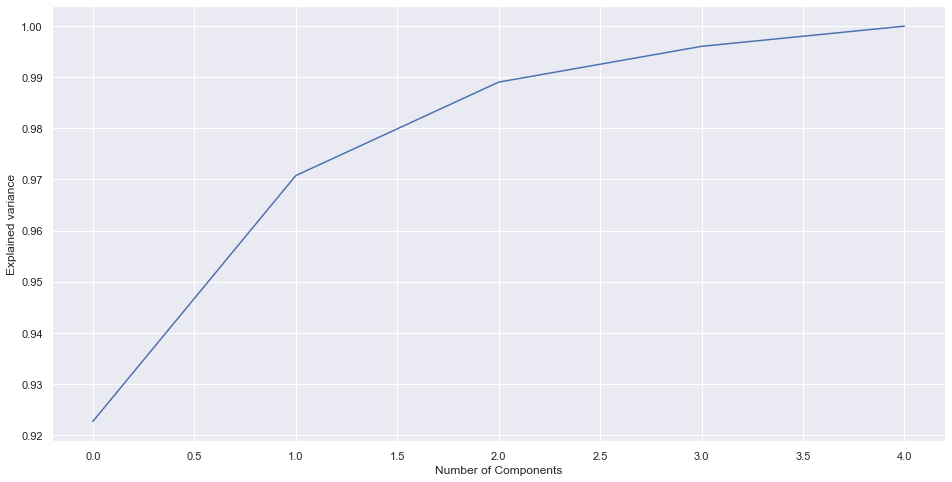

In [56]:
plt.plot(np.cumsum(pca_5.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Explained variance")
plt.savefig("elbow_plot.png",dpi=100)

Now, we are in the right place. By looking at this plot, we can see the followings.

In [57]:
print("Variance explained by the first principal components =", np.cumsum(pca_5.explained_variance_ratio_*100)[0])
print("Variance explained by the second principal components =", np.cumsum(pca_5.explained_variance_ratio_*100)[1])
print("Variance explained by the third principal components =", np.cumsum(pca_5.explained_variance_ratio_*100)[2])
print("Variance explained by the fourth principal components =", np.cumsum(pca_5.explained_variance_ratio_*100)[3])
print("Variance explained by the fifth principal components =", np.cumsum(pca_5.explained_variance_ratio_*100)[4])

Variance explained by the first principal components = 92.26404498570732
Variance explained by the second principal components = 97.07445618851995
Variance explained by the third principal components = 98.90441865288467
Variance explained by the fourth principal components = 99.60450482359337
Variance explained by the fifth principal components = 100.0


Let’s apply PCA to our dataset with n_components=2. This will project our original data onto a two-dimensional subspace. This will return 2 components that capture 97.07% of the variability in data.

In [58]:
pca_2=PCA(n_components=2, random_state=2020)
pca_2.fit(dataset)
dataset_pca_2=pca_2.transform(dataset)

Now, we create a 2d scatterplot of the data using the values of the two principal components.

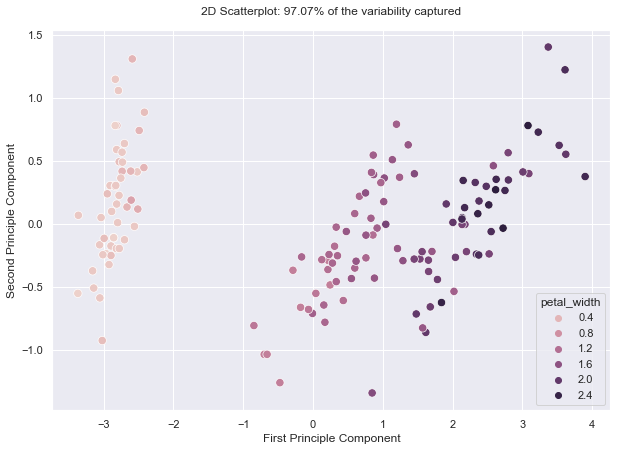

In [59]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=dataset_pca_2[:, 0], y=dataset_pca_2[:, 1], s=70, hue=dataset.petal_width)
plt.title("2D Scatterplot: 97.07% of the variability captured", pad=15)
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")
plt.savefig("2d_scatterplot.png")

In [60]:
pca_97=PCA(n_components=0.97, random_state=2020)
pca_97.fit(dataset)
dataset_pca_97=pca_97.transform(dataset)

In [61]:
dataset_pca_97.shape

(150, 2)

This means that the algorithm has found 2 principal components to preserve 97% of the variability in the data. The dataset_pca_97 array holds the values of all 2 principal components. We can visualize these values as in the following plot.

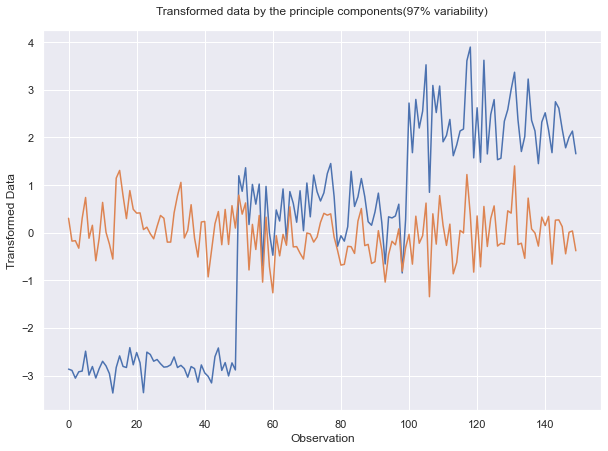

In [62]:
plt.figure(figsize=(10,7))
plt.plot(dataset_pca_97)
plt.xlabel('Observation')
plt.ylabel('Transformed Data')
plt.title('Transformed data by the principle components(97% variability)', pad=15)
plt.savefig('plot.png')

Let’s create a pandas DataFrame using the values of all 2 principal components and add the petal_width column of the original dataset.

In [63]:
dataset_new= pd.DataFrame(dataset_pca_97, columns=['PC1','PC2'])
dataset_new['petal_width']=dataset[['petal_width']]

In [64]:
dataset_new.shape

(150, 3)

When we compare with the original dataset that has 5 features, this contains only 2 features, but with 97% of the variability in data. For future reference, we can save our new dataset as an Excel or CSV file. By setting index=False, the row index labels are not saved in the files.

In [65]:
dataset_new.to_excel('iris_97.xlsx', index=False)
dataset_new.to_csv('iris_97.csv', index=False)

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
print(X_train)

     sepal_length  sepal_width  petal_length  species
60            5.0          2.0           3.5        1
116           6.5          3.0           5.5        2
144           6.7          3.3           5.7        2
119           6.0          2.2           5.0        2
108           6.7          2.5           5.8        2
..            ...          ...           ...      ...
9             4.9          3.1           1.5        0
103           6.3          2.9           5.6        2
67            5.8          2.7           4.1        1
117           7.7          3.8           6.7        2
47            4.6          3.2           1.4        0

[105 rows x 4 columns]


In [68]:
rf = RandomForestRegressor(n_estimators=100, max_depth=3,
                                 bootstrap=True, n_jobs=-1,
                                 random_state=0)
rf.fit(X_train, Y_train)

C:\Users\nisha\AppData\Local\Temp\ipykernel_14292\2787845392.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


RandomForestRegressor(max_depth=3, n_jobs=-1, random_state=0)

In [69]:
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'species']
feature_names

['sepal_length', 'sepal_width', 'petal_length', 'species']

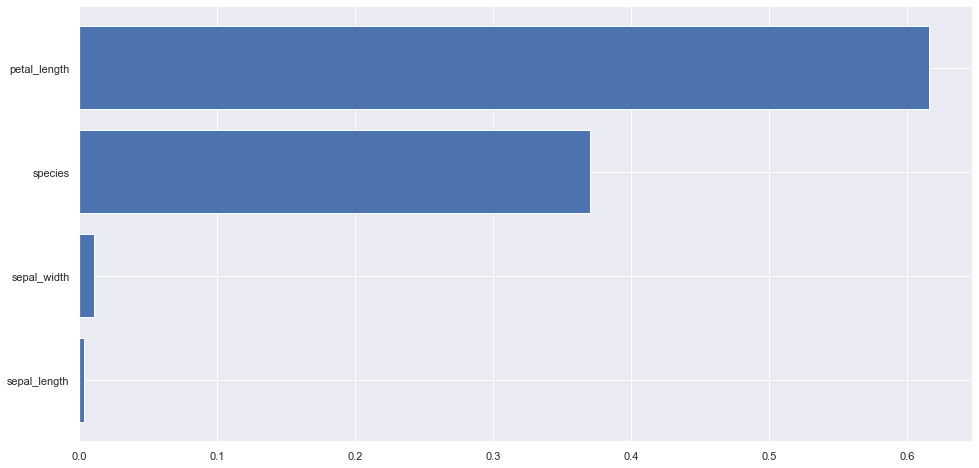

In [70]:
f_i = list(zip(feature_names,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

Now, let’s use feature importance to select the best set of features according to RFE with Cross-Validation. For this example, the metric we try to optimize is the negative mean squared error. We’re going to work with 5 folds for the cross-validation, which is a quite good value.

In [71]:
from sklearn.feature_selection import RFECV

rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")

rfe.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:310: DataConversionWarning: A column-vector y was passed when a 1

RFECV(cv=5,
      estimator=RandomForestRegressor(max_depth=3, n_jobs=-1, random_state=0),
      scoring='neg_mean_squared_error')

In [72]:
feature_names

['sepal_length', 'sepal_width', 'petal_length', 'species']

In [73]:
selected_features = np.array(feature_names)[rfe.get_support()]

In [74]:
selected_features

array(['sepal_width', 'petal_length', 'species'], dtype='<U12')

As we can see, RFE has neglected the less relevant feature (sepal_length).

# PREDICTIONS

### Random Forest Regressor

In [211]:
rf = RandomForestRegressor(n_estimators=100, max_depth=3,bootstrap=True, n_jobs=-1,random_state=0)
rf.fit(X_train, Y_train)
print(rf.score(X_train, Y_train))

0.968705865444152


C:\Users\nisha\AppData\Local\Temp\ipykernel_14292\2534889160.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


In [213]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
Y_pred = rf.predict(X_test)    
mae = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=Y_pred) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.13804150584644087
MSE: 0.037940900781474746
RMSE: 0.19478424161485638


#### HyperParameter Tuning(GridSearch)

In [215]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [219]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [220]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000, n_jobs=-1,
                      random_state=0)

In [223]:
accuracy=grid_search.best_score_
("Grid Search Accuracy: "+ str(accuracy))

'Grid Search Accuracy: 0.9442627097297285'

In [224]:
rf = RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=300, bootstrap=True, n_jobs=-1,
                                 random_state=0)
rf.fit(X_train, Y_train)
print(rf.score(X_train, Y_train))

C:\Users\nisha\AppData\Local\Temp\ipykernel_14292\1203171953.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.9750531426778477


In [225]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
Y_pred = rf.predict(X_test)    
mae = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=Y_pred) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.13885923414336818
MSE: 0.037049772956838686
RMSE: 0.1924831757760628


### Gradient Boosting Regressor

In [226]:
from sklearn.ensemble import GradientBoostingRegressor

In [227]:
gb = GradientBoostingRegressor(
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=100,
    max_features=None,
)
gb.fit(X_train, Y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=100)

In [228]:
from sklearn.metrics import mean_squared_error

errors = [mean_squared_error(Y_test, Y_pred) for Y_pred in gb.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

The staged_predict() method measures the validation error at each stage of training (i.e. with one tree, with two trees…) to find the optimal number of trees.

Now, we can build and fit our model using the optimal number of trees.

In [203]:
best_regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=best_n_estimators,
    learning_rate=1.0
)
best_regressor.fit(X_train, Y_train)
print(best_regressor.score(X_train, Y_train))

0.9933944577754059


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [204]:
from sklearn.metrics import mean_absolute_error
Y_pred = best_regressor.predict(X_test)
mean_absolute_error(Y_test, Y_pred)

0.15721263540174252

We use the mean absolute error which can be interpreted as the average distance from our predictions and the actual values.

In [205]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=Y_pred) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.15721263540174252
MSE: 0.0425075340359334
RMSE: 0.20617355319228847


#### Hyperparameter Tuning

In [208]:
# Create the parameter grid based on the results of random search 
param_grid = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gb, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)

In [209]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 256 candidates, totalling 768 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}

In [192]:
best_grid = grid_search.best_estimator_
best_grid

GradientBoostingRegressor(learning_rate=0.03, max_depth=4, random_state=100,
                          subsample=0.9)

In [194]:
accuracy=grid_search.best_score_
accuracy

0.9409949534501133

In [199]:
best_regressor = GradientBoostingRegressor(
    max_depth=4,
    n_estimators=100,
    learning_rate=0.03,
    subsample=0.9
)
best_regressor.fit(X_train, Y_train)
print(best_regressor.score(X_train, Y_train))

0.985376754045112


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Linear Regression

In [229]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
  
lin_reg.fit(X_train, Y_train)
print(lin_reg.score(X_train, Y_train))

0.9587385039309355


In [230]:

from sklearn.metrics import mean_absolute_error,mean_squared_error
  
Y_pred = lin_reg.predict(X_test)    
mae = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=Y_pred) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.13009515979932396
MSE: 0.03497976376090016
RMSE: 0.1870287778950078


### Ridge Regression

In [248]:
from sklearn.linear_model import Ridge

rdg = Ridge(alpha = 0.5)
rdg.fit(X_train, Y_train)
rdg.score(X_train,Y_train)

0.9586731329470545

In [249]:

from sklearn.metrics import mean_absolute_error,mean_squared_error

Y_pred = rdg.predict(X_test)
mae = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=Y_pred) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.1309164354451147
MSE: 0.035159229671205564
RMSE: 0.1875079456215271


### Hyperparameter Tuning

In [250]:
param_grid = {'alpha': (np.logspace(-8, 8, 100))}
grid_search = GridSearchCV(estimator = rdg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [251]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 1.74752840000769}

In [254]:
best_regressor = Ridge(alpha = 1.74752840000769)
best_regressor.fit(X_train, Y_train)
best_regressor.score(X_train,Y_train)

0.9581286042460416

### Lasso Regression

In [88]:
from sklearn.linear_model import Lasso

lsso = Lasso(alpha = 0.5)
lsso.fit(X_train, Y_train)
lsso.score(X_train,Y_train)

0.8099040638479833

In [232]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

Y_pred = lsso.predict(X_test)
mae = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=Y_pred) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.26854969891940933
MSE: 0.11126809551117377
RMSE: 0.3335687268182882


### Hyperparameter Tuning

In [256]:
param_grid = {'alpha': (np.logspace(-8, 8, 100))}
grid_search = GridSearchCV(estimator = lsso, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.001023531021899027}

In [257]:
best_regressor = Lasso(alpha = 0.001023531021899027)
best_regressor.fit(X_train, Y_train)
best_regressor.score(X_train,Y_train)

0.9586572459614829

### ElasticNet Regression

In [233]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha = 0.5)
enet.fit(X_train, Y_train)
enet.score(X_train,Y_train)

0.8824614288372252

In [234]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

Y_pred = enet.predict(X_test)
mae = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=Y_pred) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.21622046234422188
MSE: 0.07648093584431143
RMSE: 0.2765518682712366


### Hyperparameter Tuning

In [259]:
param_grid = {"max_iter": [1, 5, 10],"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],"l1_ratio": np.arange(0.0, 1.0, 0.1)}
grid_search = GridSearchCV(estimator = enet, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 210 candidates, totalling 630 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.520e+00, tolerance: 6.351e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


{'alpha': 0.01, 'l1_ratio': 0.0, 'max_iter': 10}

In [262]:
best_regressor = ElasticNet(alpha= 0.01, l1_ratio= 0.0, max_iter= 10)
best_regressor.fit(X_train, Y_train)
best_regressor.score(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.520e+00, tolerance: 6.351e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


0.9551686277006861

### XG Boost

In [268]:
import xgboost 

In [270]:
from xgboost import XGBRegressor 

xgb_r = XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train, Y_train)
xgb_r.score(X_train,Y_train)

[12:42:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


0.9877649667231561

In [235]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

Y_pred = xgb_r.predict(X_test)
mae = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=Y_pred) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.14708948916859096
MSE: 0.04203352106885707
RMSE: 0.2050207820413752


### Hyperparameter tuning

In [263]:
param_grid = { 'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
grid_search = GridSearchCV(estimator = xgb_r, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[12:38:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


{'max_depth': 3, 'min_child_weight': 5}

In [264]:
best_regressor = XGBRegressor(max_depth=3, min_child_weight=5)
best_regressor.fit(X_train, Y_train)
best_regressor.score(X_train,Y_train)

0.9920953936672579

### Decision Tree Regressor

In [271]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
decision_t = DecisionTreeRegressor(criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0, ) 
  
# fit the regressor with X and Y data
decision_t.fit(X_train, Y_train)
decision_t.score(X_train, Y_train)

0.9986615297402843

In [272]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

Y_pred = decision_t.predict(X_test)
mae = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=Y_pred) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.18
MSE: 0.06599999999999999
RMSE: 0.25690465157330256


### Hyperparameter Tuning

In [273]:
param_grid = { "splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
grid_search = GridSearchCV(estimator = decision_t, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 50400 candidates, totalling 151200 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
67200 fits failed out of a total of 151200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fra

{'max_depth': 7,
 'max_features': 'log2',
 'max_leaf_nodes': 80,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [276]:
best_regressor = DecisionTreeRegressor(max_depth=7,max_features="log2",max_leaf_nodes=80,min_samples_leaf=4, min_weight_fraction_leaf=0.1,splitter="best")
best_regressor.fit(X_train, Y_train)
best_regressor.score(X_train,Y_train)

0.8622788929771021

### Support Vector Machine

In [101]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, Y_train)
svr.score(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9620904517030797

In [237]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

Y_pred = svr.predict(X_test)
mae = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=Y_pred) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.13552190730734348
MSE: 0.03549959173007191
RMSE: 0.18841335337515733


### HyperParameter Tuning

In [277]:
param_grid = { 'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
grid_search = GridSearchCV(estimator = svr, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1.5, 'epsilon': 0.1, 'gamma': 1e-07, 'kernel': 'linear'}

In [278]:
best_regressor = SVR(C=1.5, epsilon=0.1,gamma=1e-07, kernel="linear")
best_regressor.fit(X_train, Y_train)
best_regressor.score(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9586731468517016

### Stochastic Gradient Descent

In [290]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(alpha=0.0001, epsilon=0.01, penalty='elasticnet')
sgdr.fit(X_train, Y_train)
sgdr.score(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9442442152898032

In [238]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

Y_pred = sgdr.predict(X_test)
mae = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=Y_pred) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.16042826250159306
MSE: 0.04906632878556567
RMSE: 0.22150920699954138


### K-Nearest Neighbor

In [107]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model and set the number of neighbors to consider to 3
knn = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
knn.fit(X_train, Y_train)
knn.score(X_train, Y_train)

0.9777096586813356

In [239]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

Y_pred = knn.predict(X_test)
mae = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=Y_pred) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.13481481481481486
MSE: 0.032987654320987665
RMSE: 0.1816250377040227


### Extra Trees Regressor

In [110]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()
etr.fit(X_train, Y_train)
etr.score(X_train, Y_train)

C:\Users\nisha\AppData\Local\Temp\ipykernel_14292\3737145381.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etr.fit(X_train, Y_train)


0.9986615297402843

In [240]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

Y_pred = etr.predict(X_test)
mae = mean_absolute_error(y_true=Y_test,y_pred=Y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=Y_pred) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=Y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.1383000000000002
MSE: 0.037760750000000065
RMSE: 0.19432125462748553
